Your Project

Every student is asked to develop an original machine learning project, using the methods and approaches presented in the course. At least the following minimal elements need to be part of it: 

    Collection or synthetic creation of a data set 
    Training/Fine-tuning of one (or more) model(s) (self-developed or pre-trained) or zero-shot/few shots inference from transformer models (visual) or prompt engineering for transformers models (language).
    Interpretation and validation of results + model performance measure

Data domain can be textual, visual or a combination of both (multimodal). The topic and goal of the project can be freely chosen (hint: start from a problem, not from the solution!) and can leverage any NLP or Computer Vision supervised learning- or generative- methods or a combination of these.

Each project must be stored in a public GitHub repository (do not forget to include a README) and be fully reproducible (if a GPU or special hardware is required, this should be taken into account e.g. be sure it can be run in Google Colab).The link to the project repository must be communicated per email to the module coordinator (gava@zhaw.ch) before the deadline. 

https://www.kaggle.com/datasets/abdullahorzan/moodify-dataset/code?select=278k_labelled_uri.csv

https://www.kaggle.com/datasets/arnabchaki/tripadvisor-reviews-2023

https://www.kaggle.com/code/youssifhisham/sentimental-analysis-prediction-model

In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
!pip install langdetect
from langdetect import detect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import of files using google colab
from google.colab import drive
drive.mount('/content/drive/MyDrive')

path1 = "/content/drive/MyDrive/ML_Project/data/New_Delhi_reviews.csv"
df1 = pd.read_csv(path1)

path2 = "/content/drive/MyDrive/ML_Project/data/tripadvisor_hotel_reviews.csv"
df2 = pd.read_csv(path2)

In [40]:
#import of files using local IDE
#df1 = pd.read_csv('data/New_Delhi_reviews.csv')
#df2 = pd.read_csv('data/tripadvisor_hotel_reviews.csv')

In [6]:
def detect_language(df):
    for i in range(len(df)):
        try:
            df.loc[i, 'language'] = detect(df.loc[i, 'review_full'])
        except:
            df.loc[i, 'language'] = 'error'
            pass
    return df


In [7]:
df1.head()

,rating_review,review_full
0,5,"Totally in love with the Auro of the place, re..."
1,5,I went this bar 8 days regularly with my husba...
2,5,We were few friends and was a birthday celebra...
3,5,Fatjar Cafe and Market is the perfect place fo...
4,5,"Hey Guys, if you are craving for pizza and sea..."


In [32]:
#rename the columns
df1.rename(columns={'rating_review':'Rating', 'review_full':'Review'}, inplace=True)

In [8]:
df2.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [9]:
#check if values from df1 are in df2
df1['is_in_df2'] = df1['Review'].isin(df2['Review'])

In [10]:
df1['is_in_df2'].value_counts()

False    147581
Name: is_in_df2, dtype: int64

In [11]:
#check if values from df2 are in df1
df2['is_in_df1'] = df2['Review'].isin(df1['Review'])

In [12]:
df2['is_in_df1'].value_counts()

False    20491
Name: is_in_df1, dtype: int64

In [35]:
is_true_present = df1['is_in_df2'].any()
if is_true_present:
    print("There is at least one True value in the 'is_in_df2' column.")
else:
    print("There are no True values in the 'is_in_df2' column.")


There are no True values in the 'is_in_df2' column.


In [36]:
is_true_present = df2['is_in_df1'].any()
if is_true_present:
    print("There is at least one True value in the 'is_in_df1' column.")
else:
    print("There are no True values in the 'is_in_df1' column.")


There are no True values in the 'is_in_df1' column.


In [37]:
#drop the columns which checked for the duplicates
df1 = df1.drop('is_in_df2', axis=1)
df2 = df2.drop('is_in_df1', axis=1)

In [38]:
df1.head()

,Rating,Review,language
0,5,"Totally in love with the Auro of the place, re...",en
1,5,I went this bar 8 days regularly with my husba...,en
2,5,We were few friends and was a birthday celebra...,en
3,5,Fatjar Cafe and Market is the perfect place fo...,en
4,5,"Hey Guys, if you are craving for pizza and sea...",en


In [39]:
df2.head()

,Review,Rating,language
0,nice hotel expensive parking got good deal sta...,4,en
1,ok nothing special charge diamond member hilto...,2,en
2,nice rooms not 4* experience hotel monaco seat...,3,en
3,"unique, great stay, wonderful time hotel monac...",5,en
4,"great stay great stay, went seahawk game aweso...",5,en


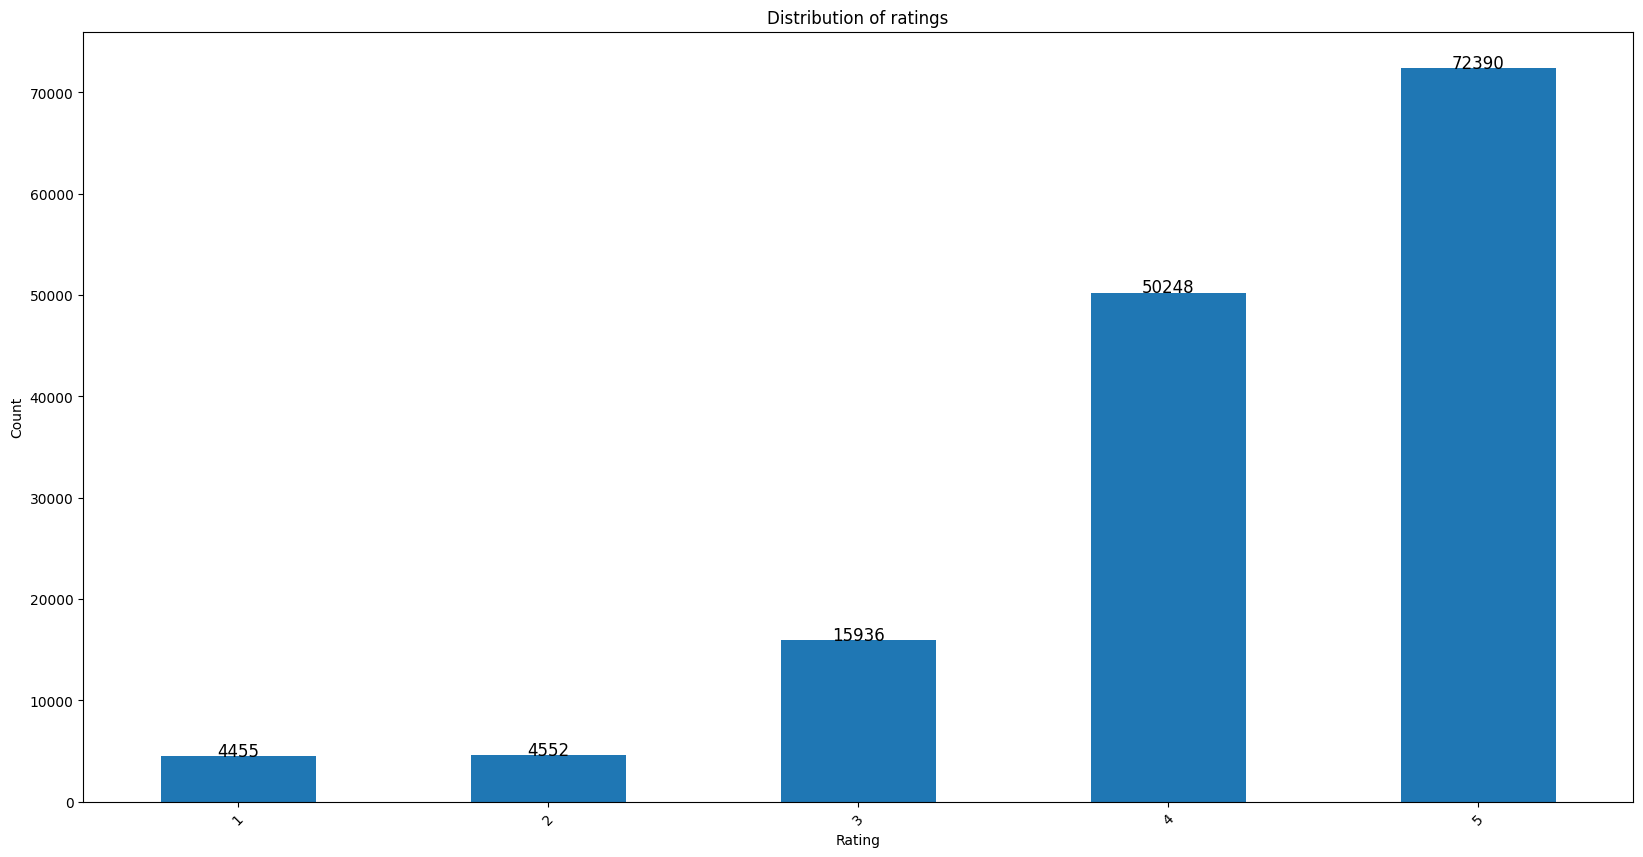

In [19]:
# Create a barchart for the ratings in the ratings dataframe
ax = df1['Rating'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

# Set the x- and y-axis labels
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# Add annotations for the count above each bar
for i, v in enumerate(df1['Rating'].value_counts().sort_index()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)

plt.title('Distribution of ratings')
plt.xticks(rotation=45)
plt.show()

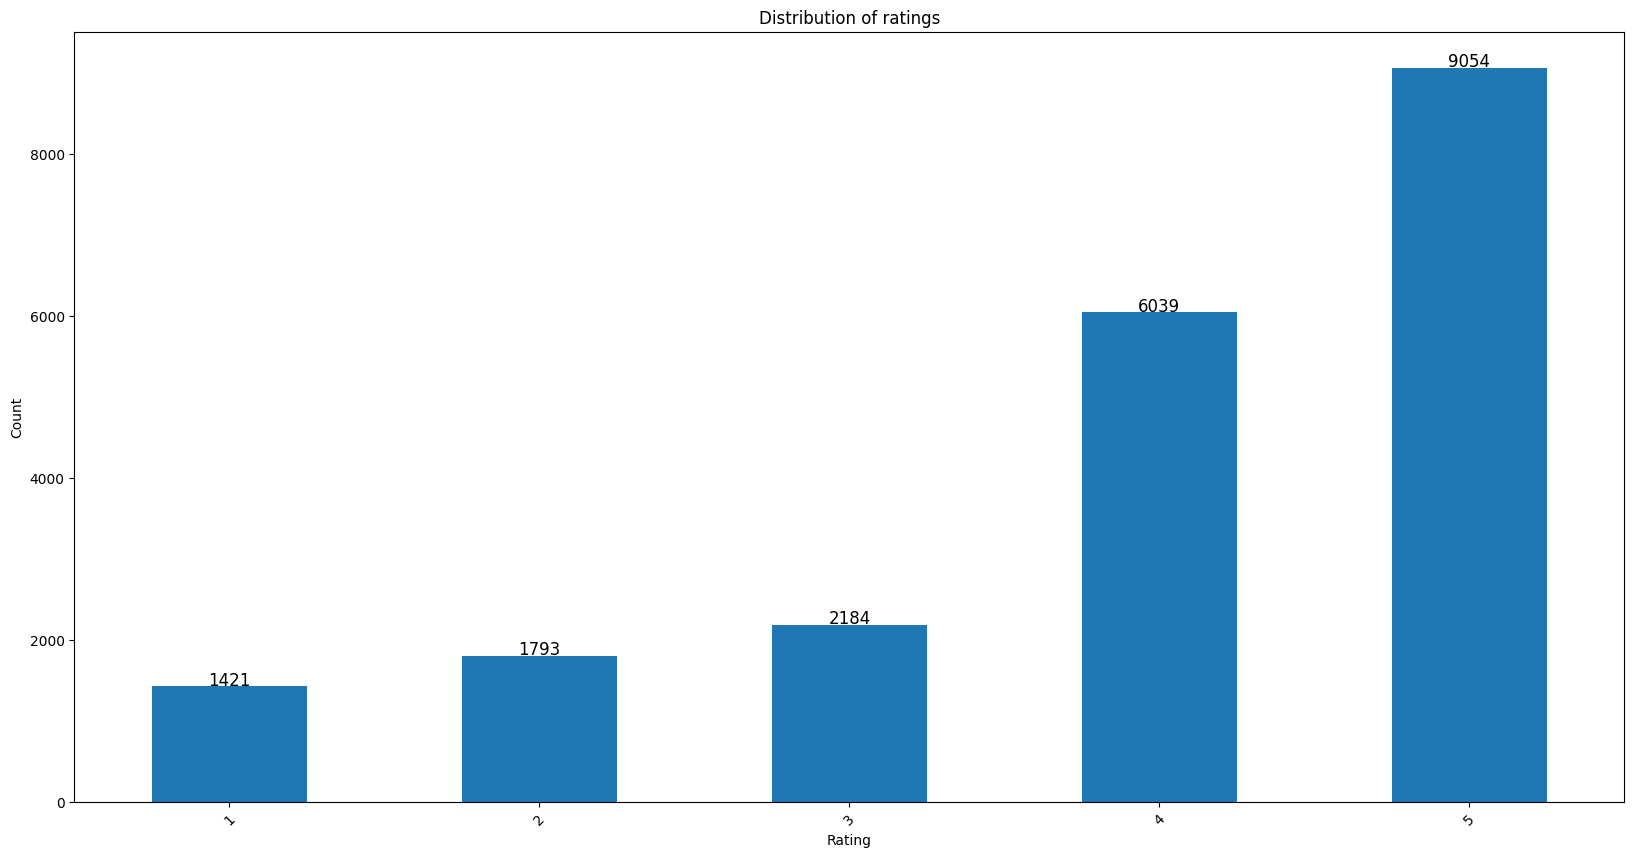

In [20]:
# Create a barchart for the ratings in the ratings dataframe
ax = df2['Rating'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

# Set the x- and y-axis labels
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# Add annotations for the count above each bar
for i, v in enumerate(df2['Rating'].value_counts().sort_index()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)

plt.title('Distribution of ratings')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Loop through the 'Review' column in df1 and detect language
for i in range(len(df1)):
    try:
        df1.loc[i, 'language'] = detect(df1.loc[i, 'Review'])
    except:
        df1.loc[i, 'language'] = 'error'
        pass

In [18]:
# Loop through the 'Review' column in df1 and detect language
for i in range(len(df2)):
    try:
        df2.loc[i, 'language'] = detect(df2.loc[i, 'Review'])
    except:
        df2.loc[i, 'language'] = 'error'
        pass

In [23]:
df1.head()

,rating_review,review_full,is_in_df2,language
0,5,"Totally in love with the Auro of the place, re...",False,en
1,5,I went this bar 8 days regularly with my husba...,False,en
2,5,We were few friends and was a birthday celebra...,False,en
3,5,Fatjar Cafe and Market is the perfect place fo...,False,en
4,5,"Hey Guys, if you are craving for pizza and sea...",False,en


In [24]:
df2.head()

,Review,Rating,is_in_df1,language
0,nice hotel expensive parking got good deal sta...,4,False,en
1,ok nothing special charge diamond member hilto...,2,False,en
2,nice rooms not 4* experience hotel monaco seat...,3,False,en
3,"unique, great stay, wonderful time hotel monac...",5,False,en
4,"great stay great stay, went seahawk game aweso...",5,False,en


In [22]:
# Create a new DataFrame with rows where language is 'en'
new_df1 = df1[df1['language'] == 'en'].copy()


In [25]:
# Create a new DataFrame with rows where language is 'en'
new_df2 = df2[df2['language'] == 'en'].copy()

In [28]:
row_count1 = len(df1)
row_countnew = len(new_df1)

print("Before checking for the language: ", row_count1," ","After checking for the language: ",row_countnew)

Before checking for the language:  147581   After checking for the language:  147488


In [29]:
row_count2 = len(df2)
row_countnew2 = len(new_df2)

print("Before checking for the language: ", row_count2," ","After checking for the language: ",row_countnew2)

Before checking for the language:  20491   After checking for the language:  20478


In [30]:
new_df2 = new_df2[new_df2['Rating']!=5]

In [31]:
row_count2 = len(df2)
row_countnew2 = len(new_df2)

print("Before checking for the language: ", row_count2," ","After checking for the language: ",row_countnew2)

Before checking for the language:  20491   After checking for the language:  11431


In [ ]:
#drop the language columns
new_df1 = new_df1.drop('language',axis=1)
new_df2 = new_df2.drop('language',axis=1)

In [ ]:
# Assuming your DataFrames are named df1 and df2
merged_df = pd.concat([new_df1, new_df2], ignore_index=True)